In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['driver_imgs_list.csv', 'train', 'test', 'sample_submission.csv']


# data augmentation
- 랜덤한 노이즈를 추가하여 모델이 학습에 사용하는 데이터를 인위적으로 부풀리는 방법
- 이미지 회전, 이동, 줌인/줌 아웃, 합성, 흐리기 등
- 해당 이미지의 클래스 값이 변질되지 않는 수준에서 변형
- 이번 대회에서는 트레인 데이터에 존재하지 않는 새로운 운전자의 데이터가 다수 포함 -> augmentation을 통해 보완 + 일반화 성능 개선

In [4]:
from glob import glob
import cv2

def read_image(path) :
    #OpenCV는 이미지 데이터를 B, G, R 순서로 읽어옴
    #cv2.cvtColor() 함수를 이용해 R,G,B 순서로 변경
    
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
import matplotlib.pyplot as plt

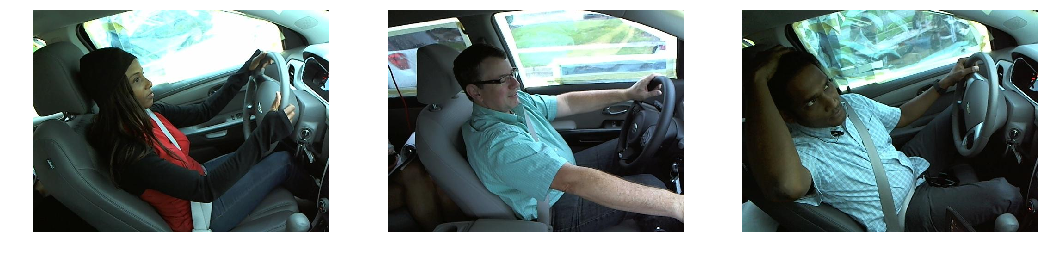

In [8]:
data_dir = '../input/'
img_path = [('c0', 55301), ('c5', 92551), ('c8', 71055)]

imgs = []
for x in range(len(img_path)) :
    imgs.append(read_image('{}train/{}/img_{}.jpg'.format(data_dir, img_path[x][0], img_path[x][1]))/255)
    
f, ax = plt.subplots(figsize = (18,10))
for i, img in enumerate(imgs) :
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

## 회전 augmentation
- RGB값을 담고 있는 배열에 변형을 가함

In [9]:
from scipy.ndimage import rotate

#이미지 회전 : -16도


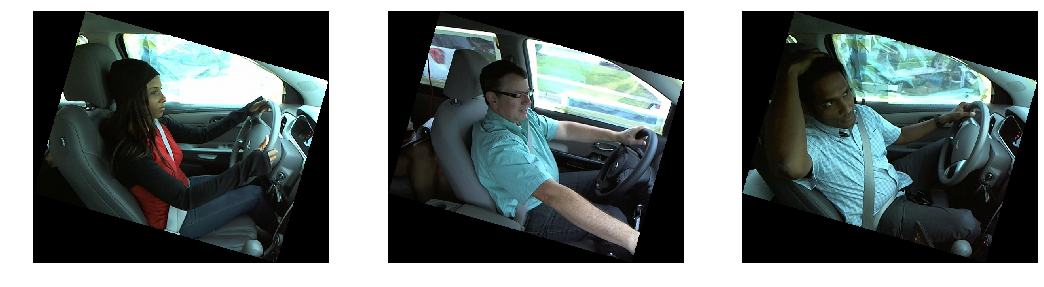

In [10]:
rotate_angle = np.random.randint(40) - 20
print('#이미지 회전 : {}도'.format(rotate_angle))

for i, img in enumerate(imgs) :
    imgs[i] = rotate(img, rotate_angle)
    
f, ax = plt.subplots(figsize = (18,10))
for x, img in enumerate(imgs) :
    plt.subplot(1,3,x+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

- 검은색 부분이 늘어난다

# 확대 augmentation

In [11]:
def crop_center(img, cropx, cropy) :
    y,x = img.shape
    startx = x//2 - (cropx//2)
    starty = y//2 - (cropy//2)
    
    return img[starty:starty + cropy, startx:startx + cropx]

(638, 748, 3)

# 이미지 확대 : (x : 0.83, y : 0.98)


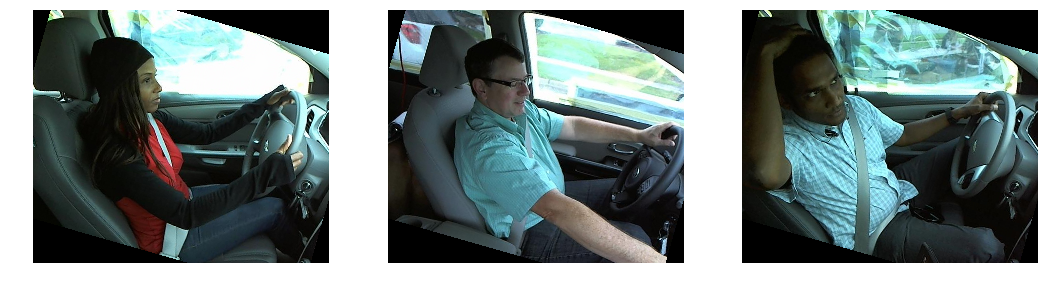

In [23]:
#x,y 축의 이미지 확대 비율을 랜덤으로 정의
width_zoom = int(imgs[0].shape[0] * (0.8+0.2*(1-np.random.random())))
height_zoom = int(imgs[0].shape[1] * (0.8+0.2*(1-np.random.random())))

print('# 이미지 확대 : (x : {}, y : {})'.format(round(width_zoom / imgs[0].shape[0],2), round(height_zoom / imgs[0].shape[1],2)))
for i, img in enumerate(imgs) :
    final_image = np.zeros((width_zoom, height_zoom, 3))
    
    final_image[:,:,0] = crop_center(img[:,:,0], height_zoom, width_zoom)
    final_image[:,:,1] = crop_center(img[:,:,1], height_zoom, width_zoom)
    final_image[:,:,2] = crop_center(img[:,:,2], height_zoom, width_zoom)
    
    imgs[i] = final_image
    
f, ax = plt.subplots(figsize = (18,10))
for x, img in enumerate(imgs) :
    plt.subplot(1,3,x+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

 - 확대를 통해 검은색 부분이 많이 사라졌다
 - 글머에도 필요한 정보는 대부분 담고 있다

# blur augmentation
- 모든 픽셀의 RGB값을 주변 10x10 픽셀의 평균값으로 대체하는 방법

10X10 커널 크기로 이미지 흐리기


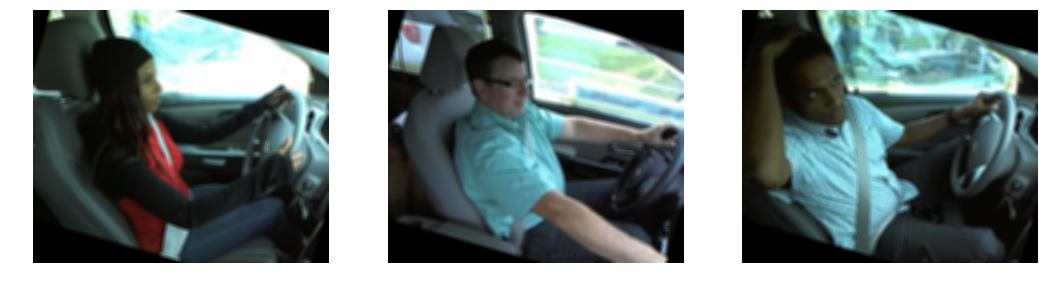

In [24]:
blur_degree = 10
print('{}X{} 커널 크기로 이미지 흐리기'.format(blur_degree, blur_degree))

for i, img in enumerate(imgs) :
    imgs[i] = cv2.blur(img, (blur_degree, blur_degree))
    
f, ax = plt.subplots(figsize = (18,10))
for x, img in enumerate(imgs) :
    plt.subplot(1,3,x+1)
    plt.imshow(img)
    plt.axis('off')
    
plt.show()